# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [1]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading in the Nobel Prize data
nobel = pd.read_csv("datasets/nobel.csv")

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...

# Shape of data
row, col = nobel.shape
print("Total number of Rows: {}\nTotal number of Columns: {}".format(row, col))

# A view of the first three rows
nobel.head(3)

Total number of Rows: 911
Total number of Columns: 18


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [2]:
#A look at missing values

# Convert the missing info into a dataframe - to conviently filter the dataframe
missing = (pd.DataFrame(nobel.isnull().sum())).reset_index()

# Percentage of missing missing data
missing["Percentage"] = missing[0].apply(lambda x: round((x / len(nobel["year"]) * 100), 2))

# filter dataframe to have only missing values & sort
missing = missing[missing[0] > 0]
missing = missing.sort_values('Percentage', ascending=False)
# rename index
missing = missing.rename(columns = {"index": "Missing Columns", 0 : "Count"})

#View table
missing



,Missing Columns,Count,Percentage
16,death_city,335,36.77
17,death_country,329,36.11
15,death_date,318,34.91
12,organization_name,246,27.00
13,organization_city,244,26.78
14,organization_country,244,26.78
3,motivation,88,9.66
8,birth_date,28,3.07
9,birth_city,28,3.07
10,birth_country,26,2.85


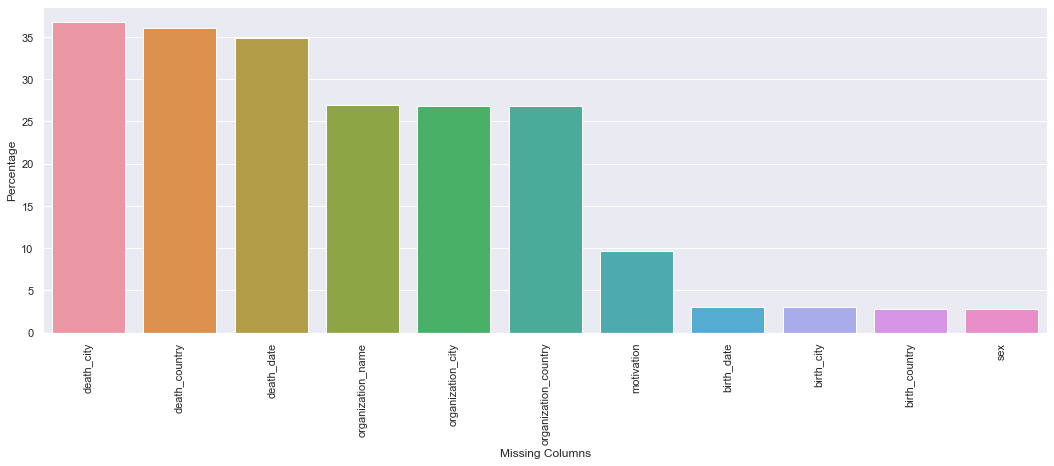

In [3]:
# Plot missing data
plt.figure(figsize=(18,6))
sns.barplot(data=missing, x='Missing Columns', y="Percentage")
x=plt.xticks(rotation=90)

In [4]:
# View dataframe types
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 71.2+ KB


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [5]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
print("Total number of Nobel Prizes handed out: {}\n".format(len(nobel["prize"])))

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
print("Number of Male recipients: {}\nNumber of Female recipients: {}".format(len(nobel[nobel["sex"]== "Male"]), len(nobel[nobel["sex"]== "Female"])))

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
top10 =pd.DataFrame((nobel["birth_country"].value_counts())[:11])
top10

Total number of Nobel Prizes handed out: 911

Number of Male recipients: 836
Number of Female recipients: 49


,birth_country
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
Japan,24
Canada,18
Netherlands,18
Russia,17
Italy,17


Which countries win most often?

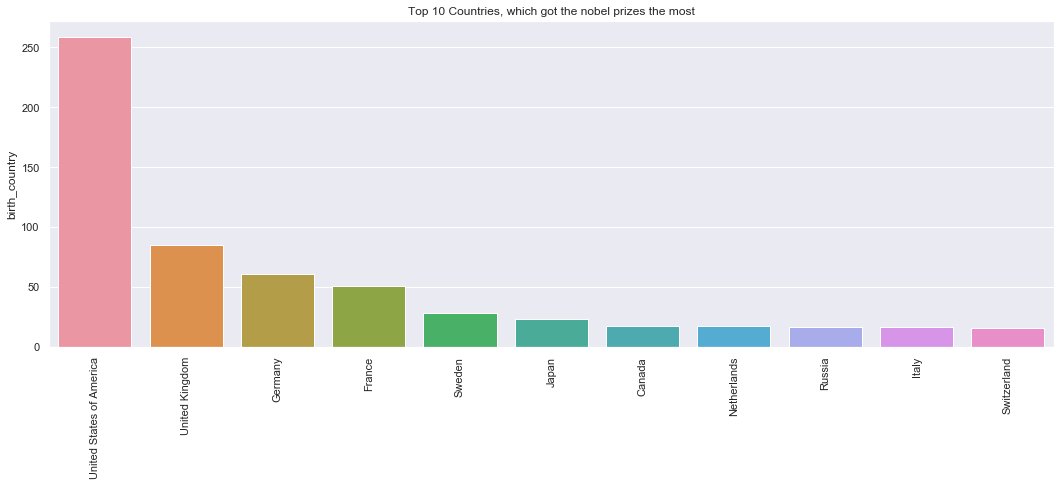

In [6]:
# A look at USA dominance relative to other countries
plt.figure(figsize=(18,6))
sns.barplot(x=top10.index,y=top10.birth_country)
plt.xticks(rotation=90)
plt.title("Top 10 Countries, which got the nobel prizes the most")
plt.show()

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [7]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner %'] = nobel["birth_country"] == "United States of America"
nobel['decade'] = nobel["year"].apply(lambda x: (x//10)*10) #integer-divide the year by 10 and then multiply by 10 to get decade

prop_usa_winners = nobel.groupby("decade", as_index=False)['usa_born_winner %'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...

# Convert use_born_winner to percentage
prop_usa_winners["usa_born_winner %"] = prop_usa_winners["usa_born_winner %"].apply(lambda x: round(x * 100,2))
# view usa winners
prop_usa_winners

,decade,usa_born_winner %
0,1900,1.75
1,1910,7.50
2,1920,7.41
3,1930,25.00
4,1940,30.23
5,1950,29.17
6,1960,26.58
7,1970,31.73
8,1980,31.96
9,1990,40.38


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

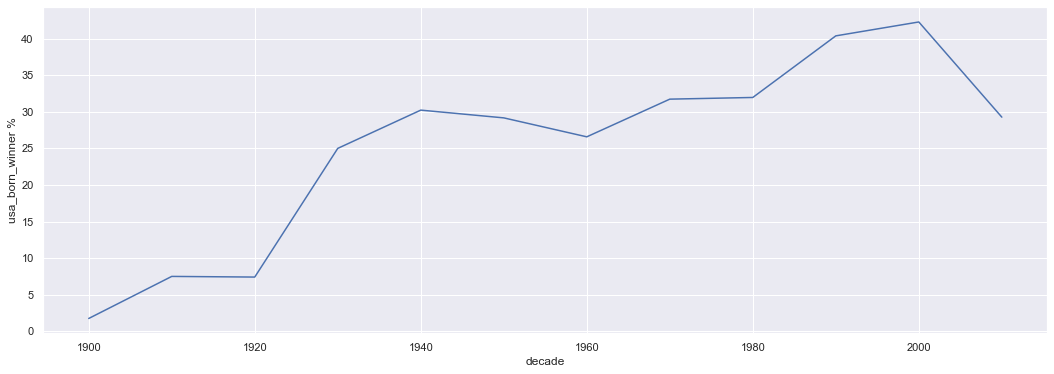

In [8]:
#using seaborn, plot the proportion of US winners by decade
plt.figure(figsize=(18,6))
#winners = sns.lineplot(x= prop_usa_winners["decade"], y = prop_usa_winners["usa_born_winner %"] , markers='d')
winners = sns.lineplot(x= prop_usa_winners["decade"], y = prop_usa_winners["usa_born_winner %"] , markers='d')


What can you conclude from the graph?

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

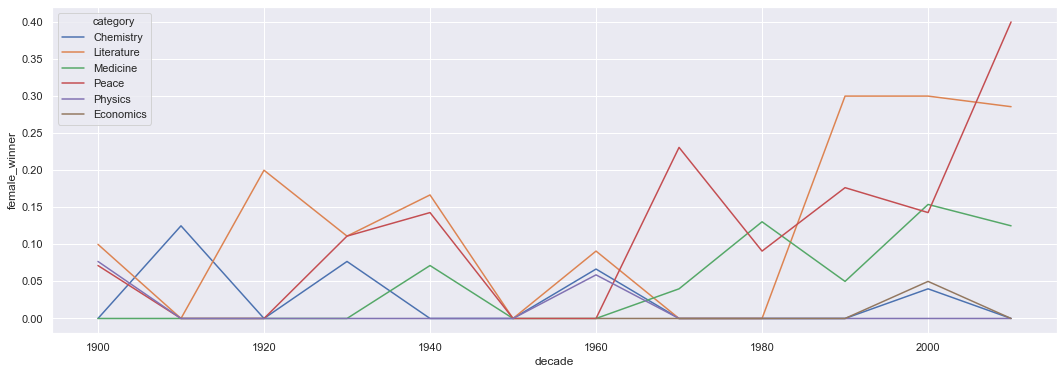

In [9]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
plt.figure(figsize=(18,6))
f = sns.lineplot("decade", "female_winner", hue="category", data=prop_female_winners)



```
# This is formatted as code
```

 Interpret your plot here

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [10]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
first_women = (nobel[nobel["sex"] == "Female"]).iloc[0,7]

print("First woman to win a Nobel Prize: {}".format(first_women))

First woman to win a Nobel Prize: Marie Curie, née Sklodowska


In [11]:
# More details about Marie Curie, née Sklodowska
nobel[nobel["full_name"] == first_women]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner %,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [12]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...

#Total count of laureates
df = pd.DataFrame(nobel["laureate_id"].value_counts())

#Dataframe of laureates with 2 or more prizes 
df = (df[df["laureate_id"] > 1]).reset_index()

#Using the above df to get the Laureates
laureates = nobel.loc[nobel["laureate_id"].isin((np.sort(np.array(df["index"]))))]

# Display the laureates
laureates

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner %,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False





How many people have received 2 or more prizes?

In [13]:
print("Laureates that have received 2 or more prizes: {}".format(len(laureates)))

Laureates that have received 2 or more prizes: 13


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [14]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])

# Calculating the age of Nobel Prize winners
nobel["age"] = nobel["year"] - nobel["birth_date"].dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
#nobel["age"].describe() - avg = 59.453001, std = 12.399290

print("Mean age of winners: {}".format(round(nobel["age"].mean(),2)))
print("Standard devation age of winners: {}".format(round(nobel["age"].std(),2)))
print("Median age of winners: {}".format(nobel["age"].median()))


Mean age of winners: 59.45
Standard devation age of winners: 12.4
Median age of winners: 60.0


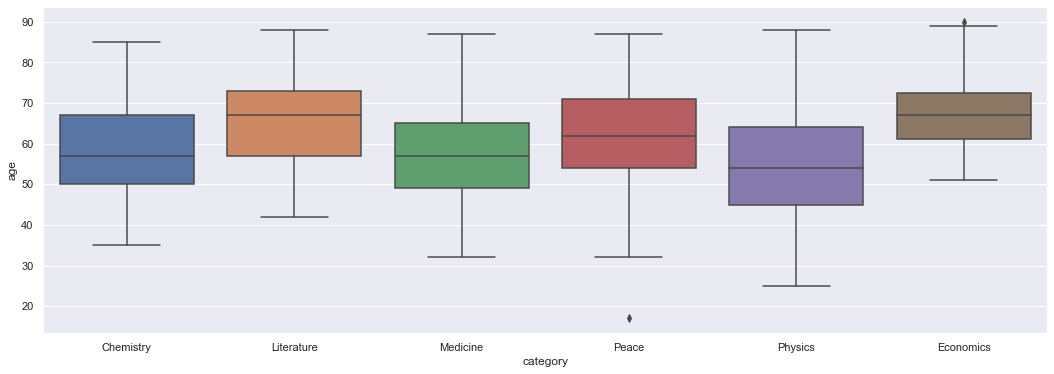

In [15]:
#A view of the distribution of age of Winner
plt.figure(figsize=(18,6))
sns.boxplot(data=nobel,
         x='category',
         y='age')

plt.show()

## 9. Age differences between prize categories


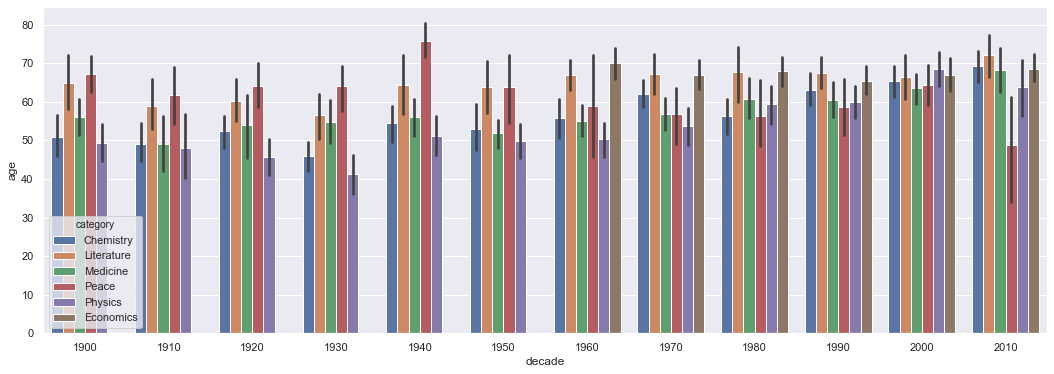

In [16]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
plt.figure(figsize=(18,6))

sns.barplot(x ="decade", y="age", hue="category", data=nobel)

# Plot the age of nobel candidates by decade and prize category

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [17]:
# A view of the youngest winner
youngest =nobel.nsmallest(1,"age")
oldest = nobel.nlargest(1,"age")

#print the name
print("Youngest nobel prize winner: {} at {} years old".format(youngest.iloc[0,7], str(int(youngest.iloc[0,21]))))
print("Oldest nobel prize winner: {} at {} years old".format(oldest.iloc[0,7], str(int(oldest.iloc[0,21]))))
#str(int(youngest.iloc[0,21]))

Youngest nobel prize winner: Malala Yousafzai at 17 years old
Oldest nobel prize winner: Leonid Hurwicz at 90 years old


## Congratulations! You've reached the end of the challenge!